In [ ]:
pwd # to know the present working directory

In [3]:
import os
os.chdir("C:\\Users\\maram\\Desktop\\prasad\\Data") # we can change the directory

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve # i may be using these or not, we'll see
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from warnings import filterwarnings # Escape from warnings
filterwarnings('ignore')

In [5]:
pwd

'C:\\Users\\maram\\Desktop\\prasad\\Data'

In [7]:
cancer_data = pd.read_csv("xgboost_data.csv")
df = cancer_data.copy()
df =df.dropna()
df.head(5)
#cancer_data.head(5)

,id,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst
0,842302,M,17.99,10.38,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,...,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33
1,842517,L,20.57,17.77,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,...,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41
2,84300903,L,19.69,21.25,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,...,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53
3,84348301,L,11.42,20.38,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,...,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50
4,84358402,L,20.29,14.34,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,...,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 22 columns):
id                        569 non-null int64
diagnosis                 569 non-null object
radius_mean               569 non-null float64
texture_mean              569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
radius_se                 569 non-null float64
texture_se                569 non-null float64
perimeter_se              569 non-null float64
area_se                   569 non-null float64
smoothness_se             569 non-null float64
compactness_se            569 non-null float64
concavity_se              569 non-null float64
concave points_se         569 non-null float64
symmetry_se               569 non-null float64
fract

In [9]:
df.isnull().any()

id                        False
diagnosis                 False
radius_mean               False
texture_mean              False
area_mean                 False
smoothness_mean           False
compactness_mean          False
concavity_mean            False
symmetry_mean             False
fractal_dimension_mean    False
radius_se                 False
texture_se                False
perimeter_se              False
area_se                   False
smoothness_se             False
compactness_se            False
concavity_se              False
concave points_se         False
symmetry_se               False
fractal_dimension_se      False
radius_worst              False
texture_worst             False
dtype: bool

In [10]:
df.describe()

,id,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,654.889104,0.096360,0.104341,0.088799,0.181162,0.062798,0.405172,...,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223
std,1.250206e+08,3.524049,4.301036,351.914129,0.014064,0.052813,0.079720,0.027414,0.007060,0.277313,...,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258
min,8.670000e+03,6.981000,9.710000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960,0.111500,...,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000
25%,8.692180e+05,11.700000,16.170000,420.300000,0.086370,0.064920,0.029560,0.161900,0.057700,0.232400,...,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000
50%,9.060240e+05,13.370000,18.840000,551.100000,0.095870,0.092630,0.061540,0.179200,0.061540,0.324200,...,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000
75%,8.813129e+06,15.780000,21.800000,782.700000,0.105300,0.130400,0.130700,0.195700,0.066120,0.478900,...,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000
max,9.113205e+08,28.110000,39.280000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440,2.873000,...,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000


In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst'],
      dtype='object')

In [12]:
df['diagnosis'].value_counts()

B    335
M    183
L     51
Name: diagnosis, dtype: int64

In [13]:
df.corr()

,id,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst
id,1.000000,0.074626,0.099770,0.096893,-0.012968,0.000096,0.050080,-0.022114,-0.052511,0.143048,...,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720
radius_mean,0.074626,1.000000,0.323782,0.987357,0.170581,0.506124,0.676764,0.147741,-0.311631,0.679090,...,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008
texture_mean,0.099770,0.323782,1.000000,0.321086,-0.023389,0.236702,0.302418,0.071401,-0.076437,0.275869,...,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045
area_mean,0.096893,0.987357,0.321086,1.000000,0.177028,0.498502,0.685983,0.151293,-0.283110,0.732562,...,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489
smoothness_mean,-0.012968,0.170581,-0.023389,0.177028,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,...,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072
compactness_mean,0.000096,0.506124,0.236702,0.498502,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,...,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133
concavity_mean,0.050080,0.676764,0.302418,0.685983,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,...,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879
symmetry_mean,-0.022114,0.147741,0.071401,0.151293,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,...,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651
fractal_dimension_mean,-0.052511,-0.311631,-0.076437,-0.283110,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,...,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269
radius_se,0.143048,0.679090,0.275869,0.732562,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,...,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.715065,0.194799


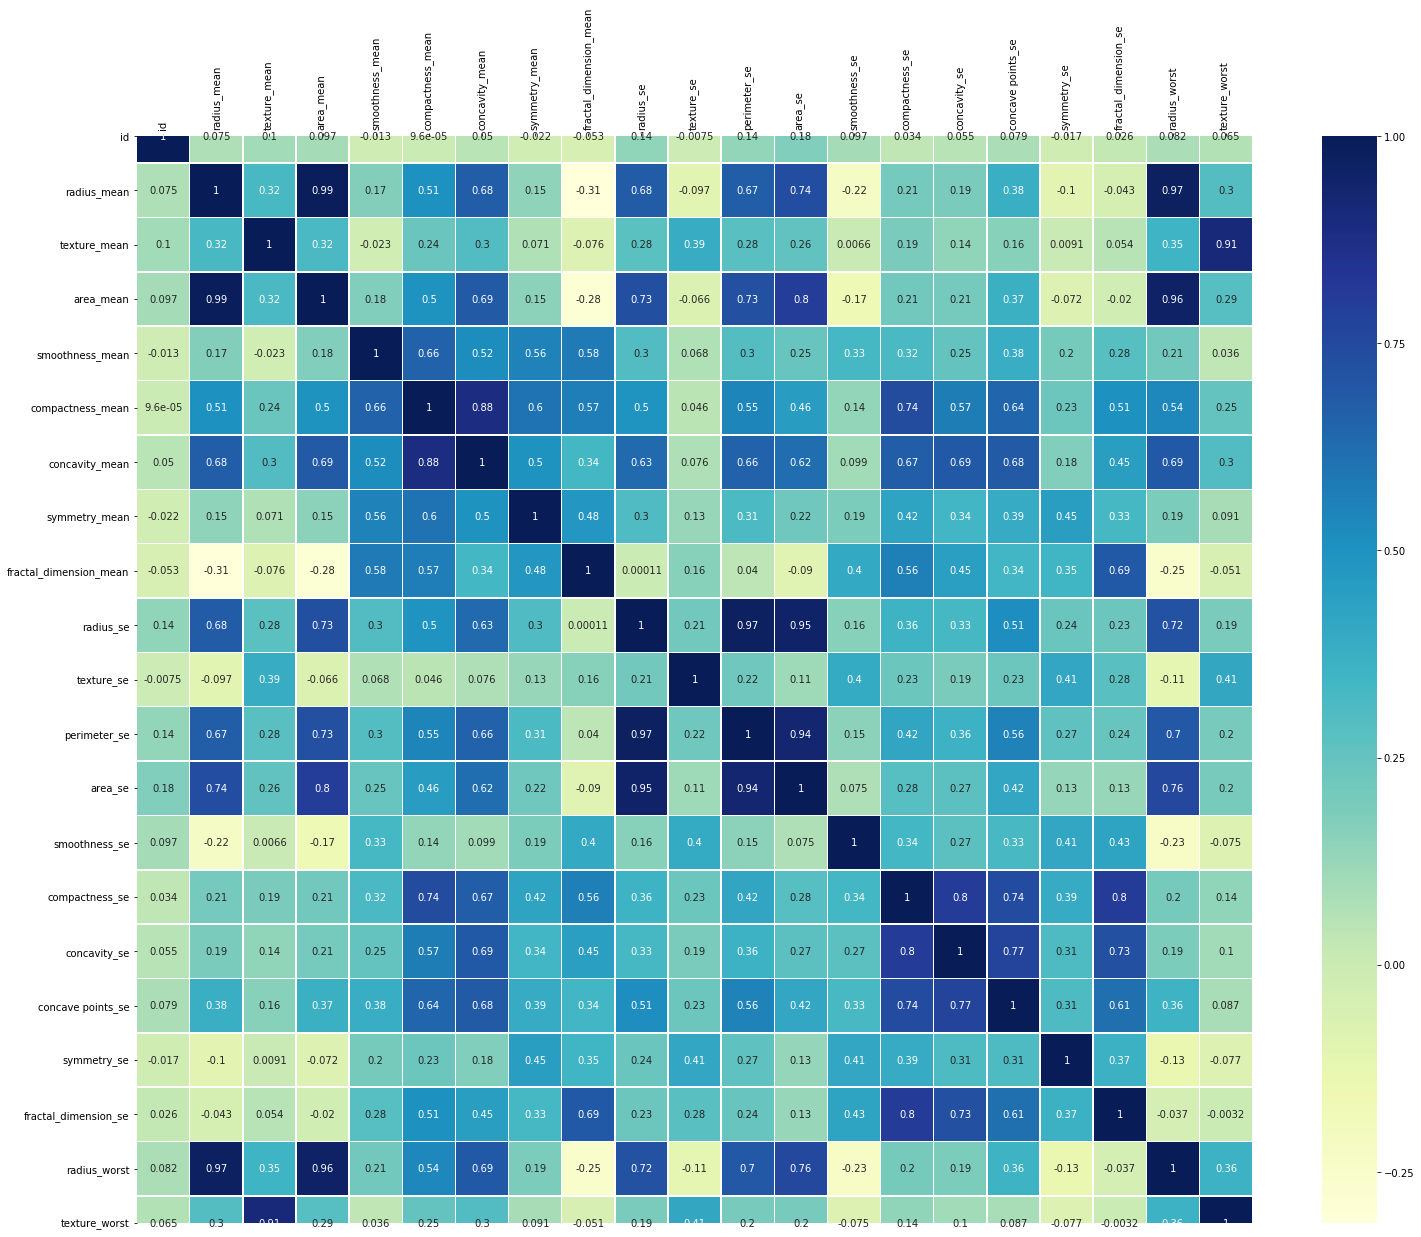

In [16]:
plt.subplots(figsize=(25,20))
heat_map = sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu', linewidths = .5)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation = 90)
heat_map.xaxis.set_ticks_position('top')

In [17]:
df.select_dtypes('number').columns

Index(['id', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst'],
      dtype='object')

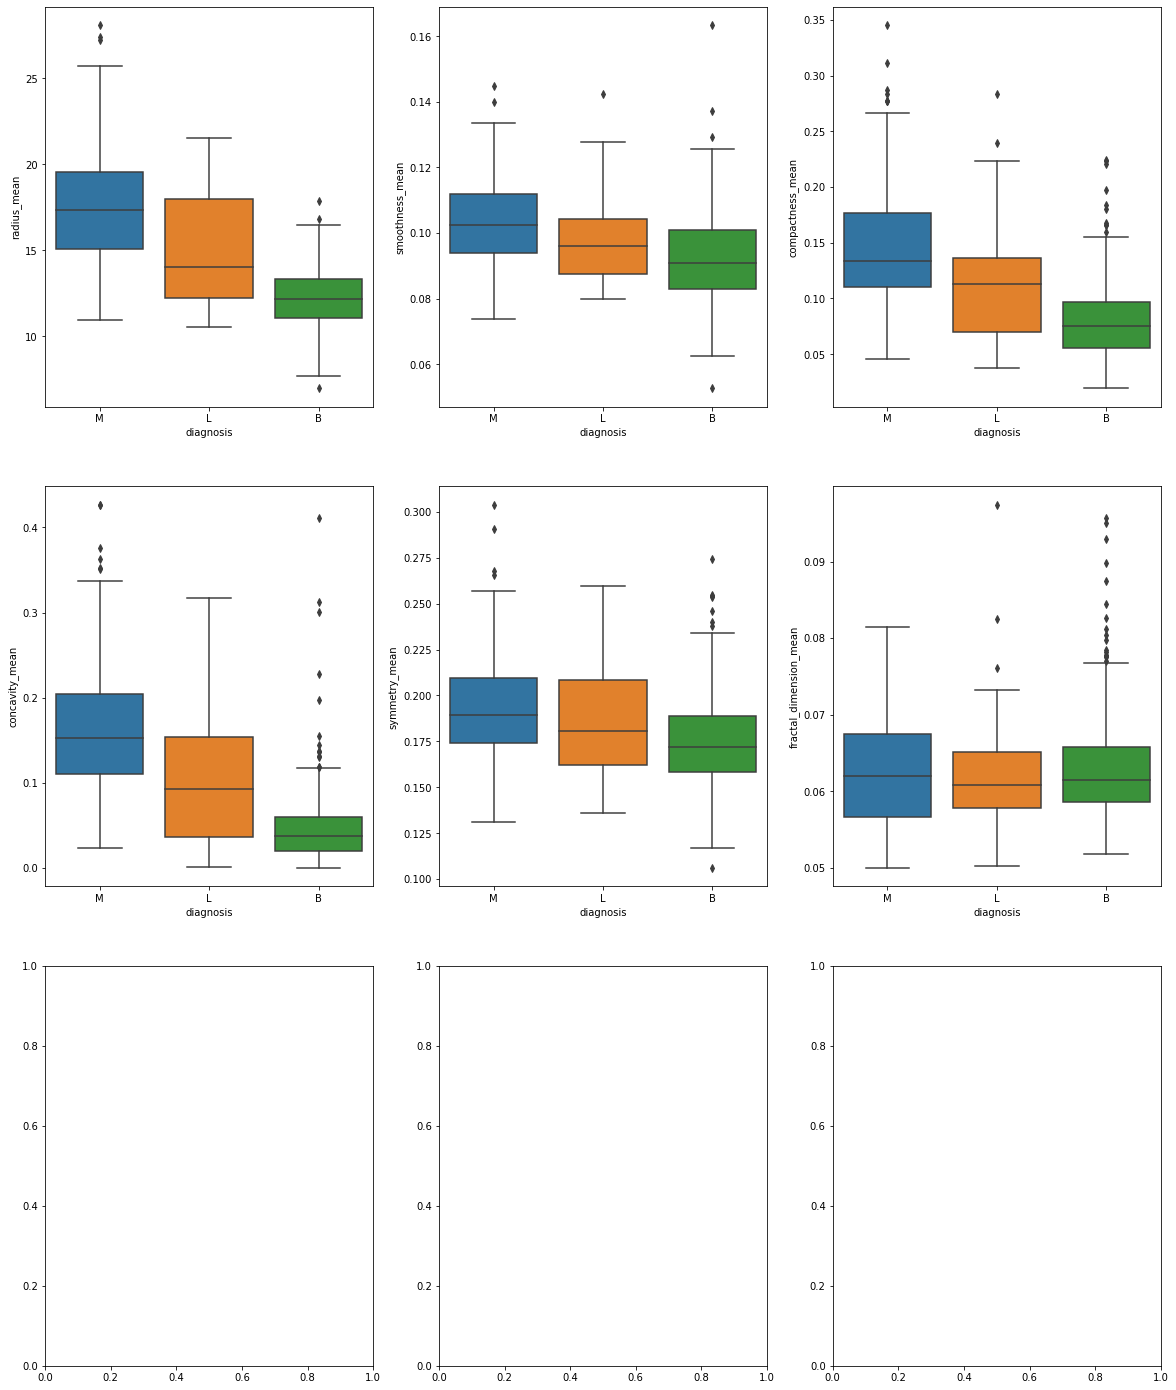

In [20]:
# we will use numerical columns for boxplot
# we will seperate columns because there is too much column for making 1 boxplot vector
num_list = ['radius_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']

f,((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 25))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for i in range(len(num_list)):
    sns.boxplot(x = 'diagnosis', y = num_list[i], data=df, ax=ax[i])

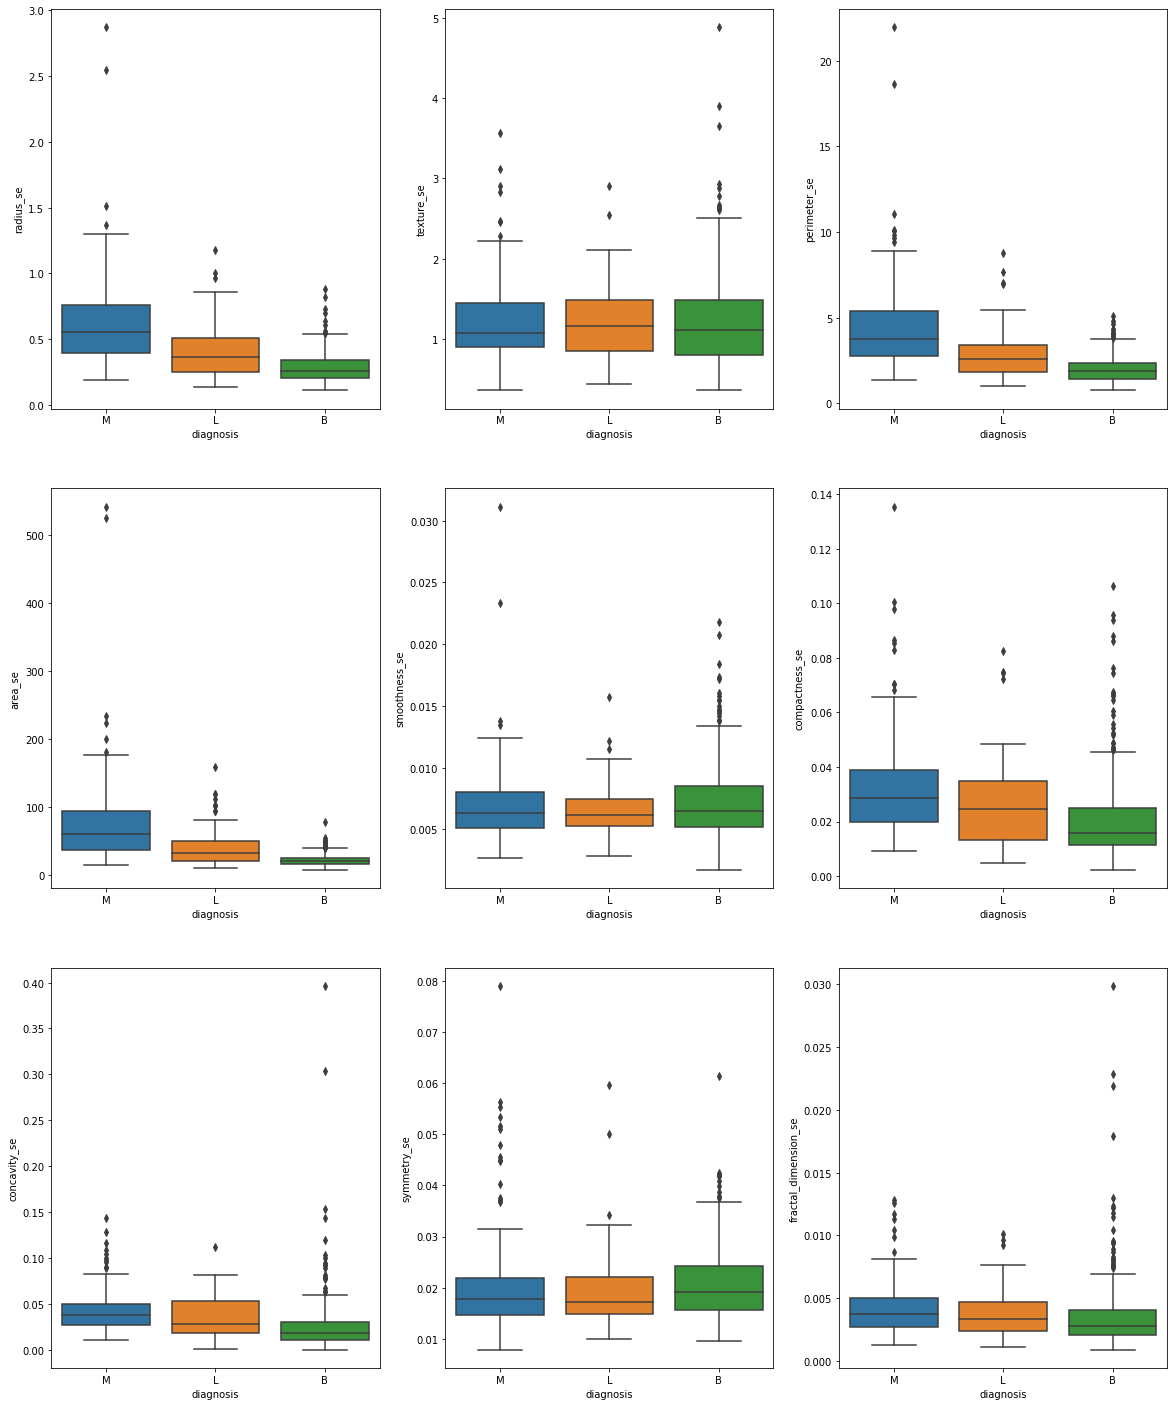

In [21]:
num_list2 = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se']

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 25))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for i in range(len(num_list2)):
    sns.boxplot(x = 'diagnosis', y = num_list2[i], data=df, ax=ax[i])

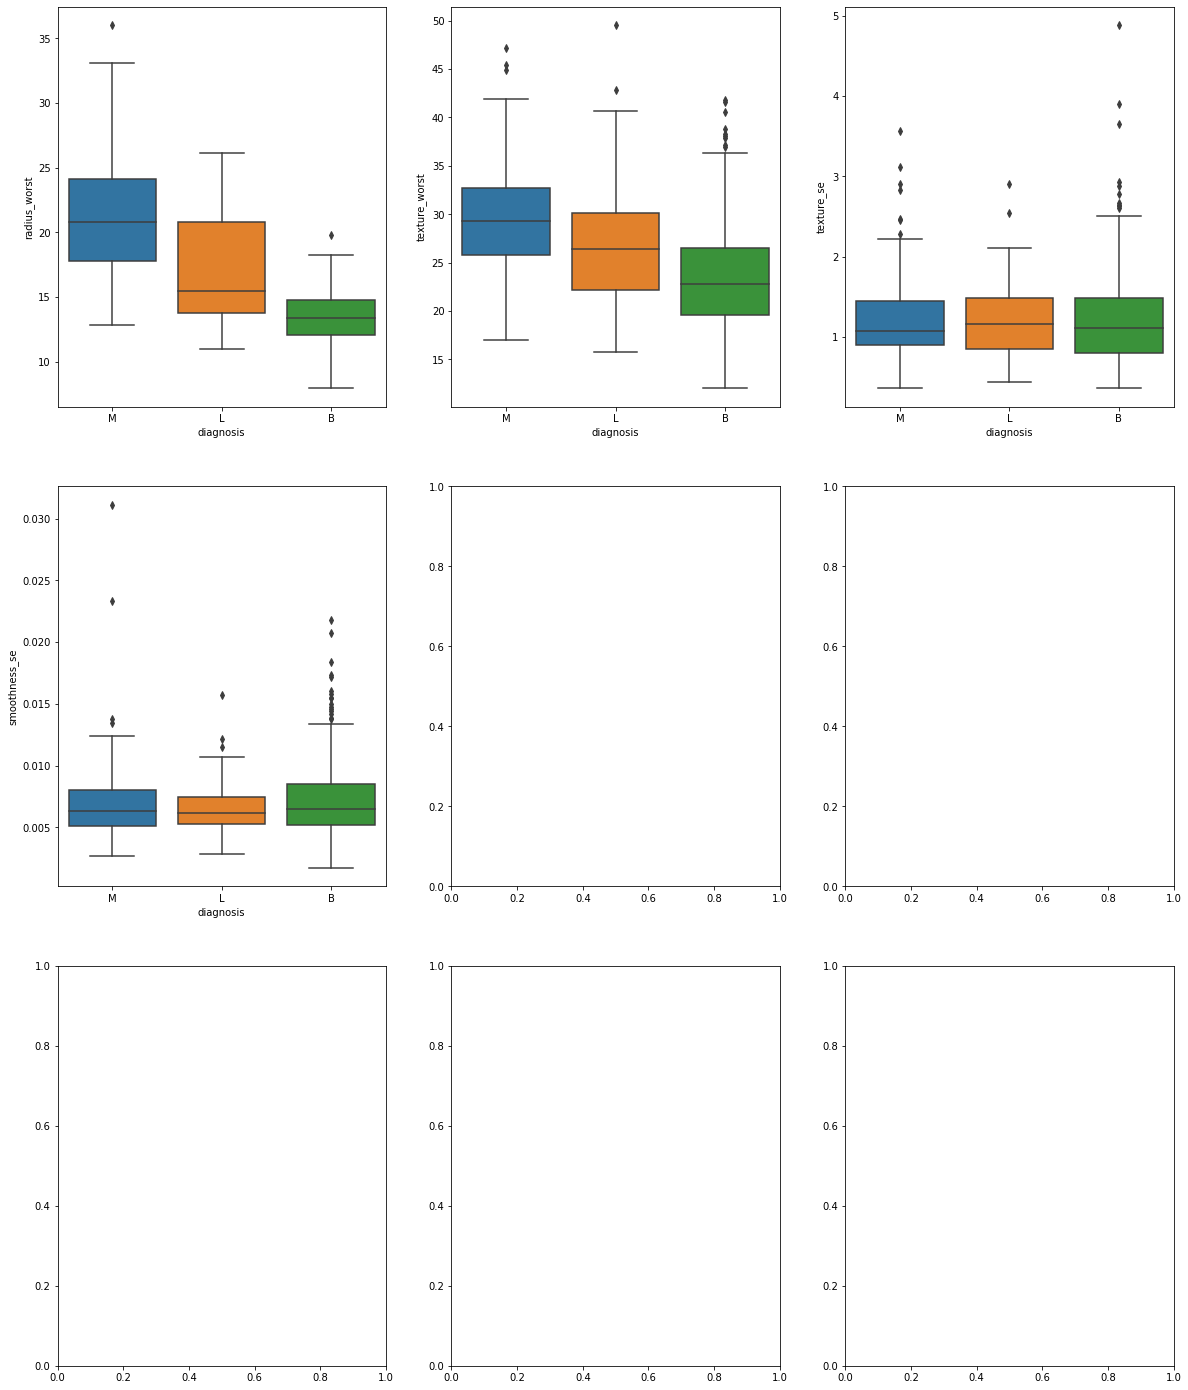

In [30]:
num_list3 =['radius_worst', 'texture_worst','texture_se','smoothness_se']

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 25))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for i in range(len(num_list3)):
    sns.boxplot(x = 'diagnosis', y = num_list3[i], data=df, ax=ax[i])

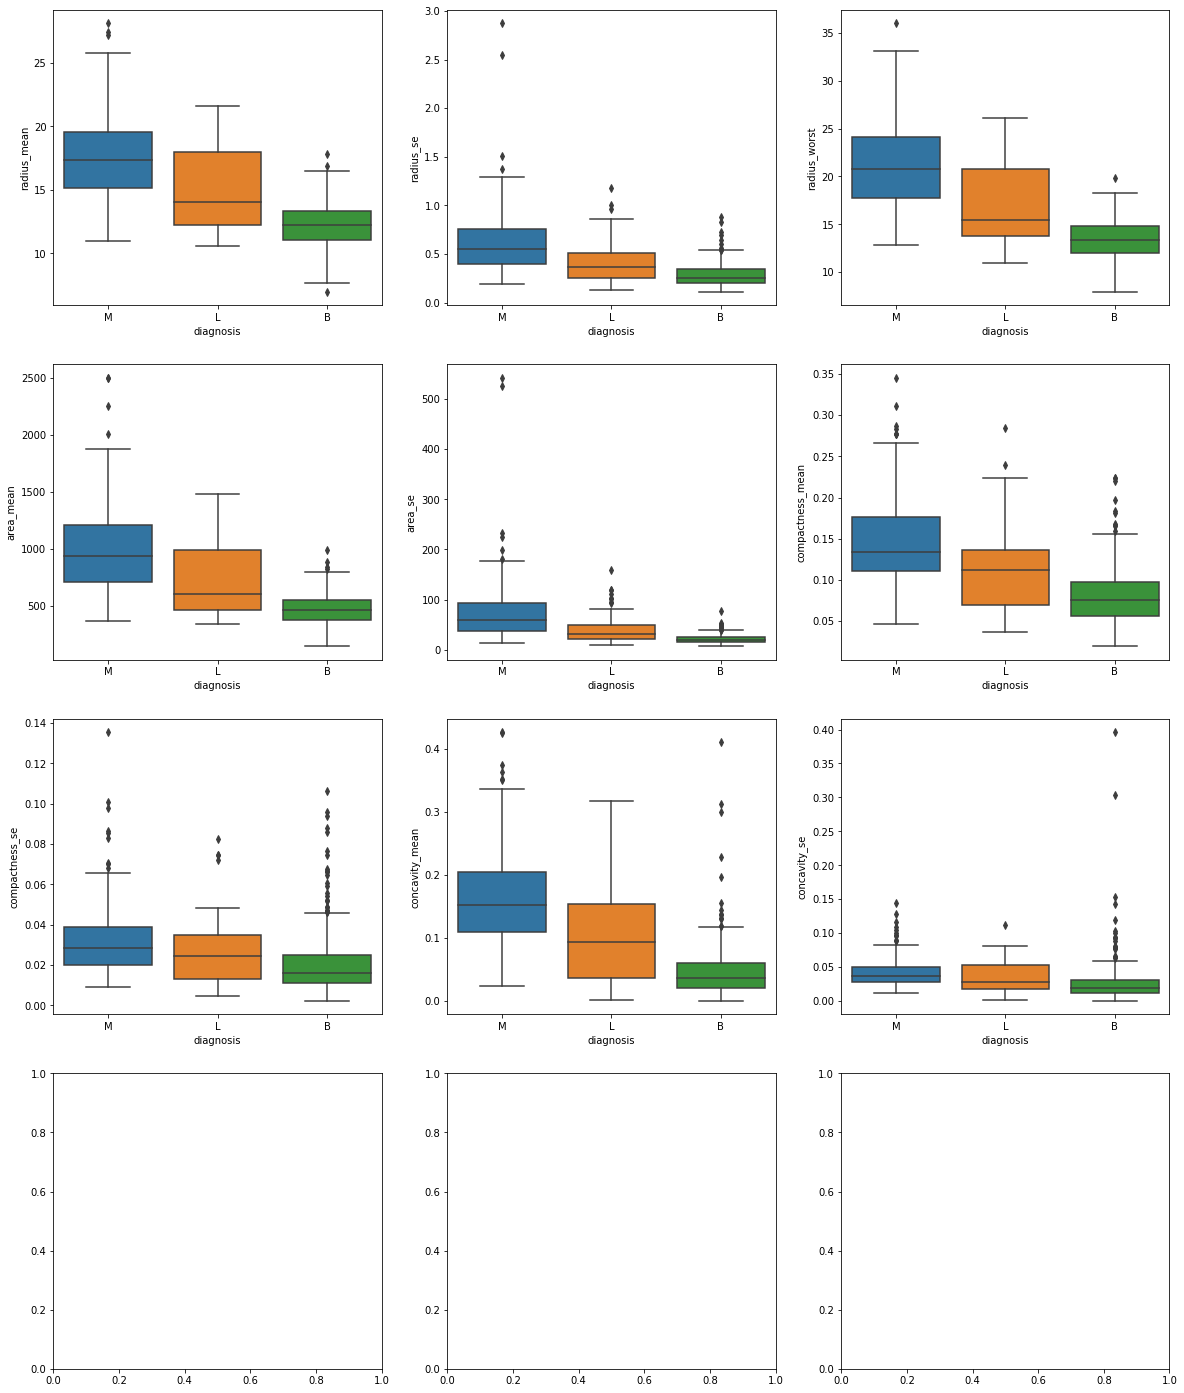

In [34]:
num_listf = ['radius_mean', 'radius_se', 'radius_worst', 'area_mean', 'area_se','compactness_mean', 'compactness_se', 'concavity_mean', 'concavity_se']
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(20, 25))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

for i in range(len(num_listf)):
    sns.boxplot(x = 'diagnosis', y = num_listf[i], data=df, ax=ax[i])

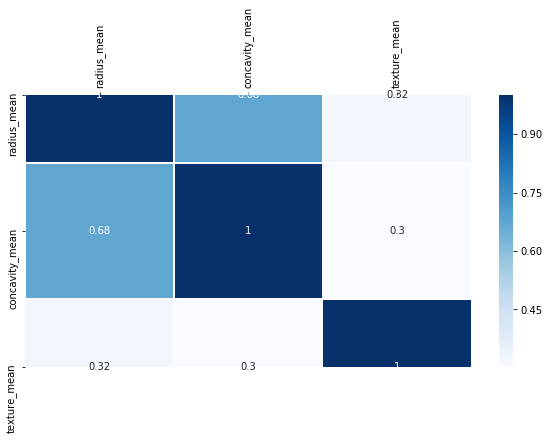

In [36]:
corr_list = ['radius_mean', 'concavity_mean', 'texture_mean']
plt.subplots(figsize=(10,5))
heat_map2 = sns.heatmap(df[corr_list].corr(), annot=True, cmap='Blues', linewidths = .5)
heat_map2.set_xticklabels(heat_map2.get_xticklabels(), rotation=90)
heat_map2.xaxis.set_ticks_position('top')

In [37]:
# significant predictors
df.loc[:, ['radius_mean', 'radius_se', 'compactness_worst', 'concavity_mean', 'texture_mean']]

,radius_mean,radius_se,compactness_worst,concavity_mean,texture_mean
0,17.99,1.0950,NaN,0.30010,10.38
1,20.57,0.5435,NaN,0.08690,17.77
2,19.69,0.7456,NaN,0.19740,21.25
3,11.42,0.4956,NaN,0.24140,20.38
4,20.29,0.7572,NaN,0.19800,14.34
...,...,...,...,...,...
564,21.56,1.1760,NaN,0.24390,22.39
565,20.13,0.7655,NaN,0.14400,28.25
566,16.60,0.4564,NaN,0.09251,28.08
567,20.60,0.7260,NaN,0.35140,29.33


In [38]:
X = df.loc[:, ['radius_mean', 'radius_se', 'compactness_worst', 'concavity_mean', 'texture_mean']]
X = X.values

y = (df['diagnosis'] == 'M').astype(int)
y = y.values

In [39]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 

In [40]:
print('Number of training records: ' + str(len(X_train)))
print('Number of testing records : ' + str(len(X_test)))

Number of training records: 455
Number of testing records : 114


In [41]:
xgb_model = XGBClassifier()

In [42]:
xgb_model.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': 1,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 1,
 'verbosity': 1}

In [43]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9122807017543859